In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from gensim import corpora
import numpy as np
import re
import os

In [2]:
df_doc = pd.read_csv('datasets/07_documents.csv')

In [3]:
df_doc.columns

Index(['Unnamed: 0', 'document_content', 'snippet_id'], dtype='object')

In [4]:
df_claims = pd.read_csv('datasets/relevent_snippets.csv')

In [5]:
df_claims.columns

Index(['Unnamed: 0', 'claim_id', 'snippet_content', 'snippet_date',
       'snippet_id', 'snippet_pagenum', 'snippet_title', 'snippet_url',
       'claim_content', 'claim_date', 'claim_label', 'claim_tag', 'claim_url',
       'similarity_score'],
      dtype='object')

In [6]:
df_merge = pd.merge(df_doc[['snippet_id','document_content']],df_claims[
    ['claim_id','snippet_id','snippet_date','claim_content','claim_label','similarity_score']])

df_merge.head(2)

,snippet_id,document_content,claim_id,snippet_date,claim_content,claim_label,similarity_score
0,2620350,\n __ _ _ _ __| |_ (_)__ _____\n / _` | '_...,11725,14960,\tSays that all those who do not answer direct...,False,0.736975
1,1357119,\n __ _ _ _ __| |_ (_)__ _____\n / _` | '_...,6464,16026,Says there’s no language in the U.S. Constitut...,True,0.699088


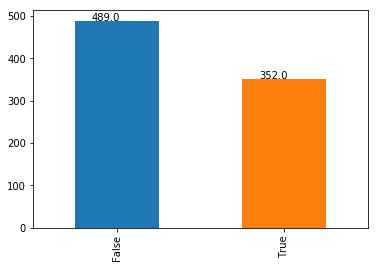

In [7]:
ax = df_merge[['claim_id','claim_label']].groupby('claim_id').first().reset_index()['claim_label'].value_counts().plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(int(p.get_height()*1000)/1000), (p.get_x() +0.1, p.get_height() +0.02))

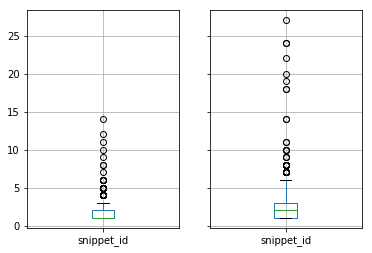

In [8]:
fig, axs = plt.subplots(1,2, sharey = True)
df_merge[df_merge['claim_label']==True][['claim_id','snippet_id']].groupby('claim_id').count().boxplot(ax=axs[0])
df_merge[df_merge['claim_label']==False][['claim_id','snippet_id']].groupby('claim_id').count().boxplot(ax=axs[1])

In [9]:
false_claim_ids = df_merge[df_merge['claim_label']==False][['claim_id','similarity_score']].groupby('claim_id')\
.mean().reset_index().sort_values(by=['similarity_score'], ascending=False).head(352)['claim_id']
print(len(false_claim_ids))
true_claim_ids = df_merge[df_merge['claim_label']==True][['claim_id','claim_label']].groupby('claim_id')\
.first().reset_index()['claim_id']
print(len(true_claim_ids))
claim_ids = pd.DataFrame(pd.concat([false_claim_ids,true_claim_ids]))
print(len(claim_ids))

352
352
704


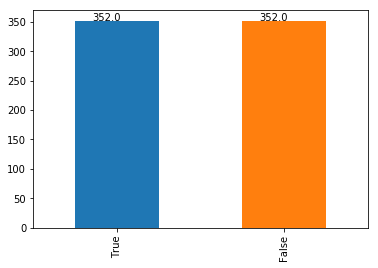

In [10]:
df_filter = pd.merge(df_merge,claim_ids)
ax = df_filter[['claim_id','claim_label']].groupby('claim_id').first().reset_index()['claim_label'].value_counts().plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(int(p.get_height()*1000)/1000), (p.get_x() +0.1, p.get_height() +0.02))

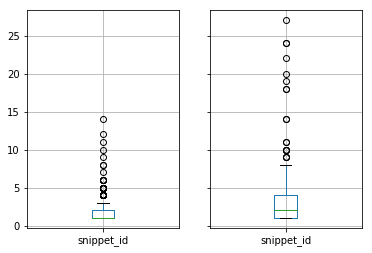

In [13]:
fig, axs = plt.subplots(1,2, sharey = True)
df_filter[df_filter['claim_label']==True][['claim_id','snippet_id']].groupby('claim_id').count()[['snippet_id']].boxplot(ax=axs[0])
df_filter[df_filter['claim_label']==False][['claim_id','snippet_id']].groupby('claim_id').count()[['snippet_id']].boxplot(ax=axs[1])

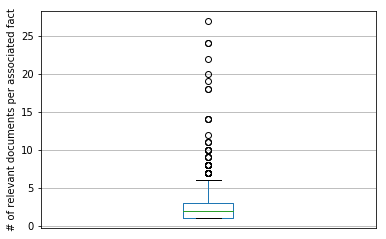

In [14]:
ax = df_filter[['claim_id','snippet_id']].groupby('claim_id').count()[['snippet_id']].boxplot()
ax.axes.get_xaxis().set_visible(False)
ax.set_ylabel('# of relevant documents per associated fact')
plt.savefig('08_distribution_number_documents')

In [17]:
print(df_filter[['claim_id','snippet_id']].groupby('claim_id').count()['snippet_id'].quantile(0.1))
print(df_filter[['claim_id','snippet_id']].groupby('claim_id').count()['snippet_id'].quantile(0.25))
print(df_filter[['claim_id','snippet_id']].groupby('claim_id').count()['snippet_id'].quantile(0.5))
print(df_filter[['claim_id','snippet_id']].groupby('claim_id').count()['snippet_id'].quantile(0.75))

1.0
1.0
2.0
3.0


In [18]:
df_count = df_filter[['claim_id','snippet_id']].groupby('claim_id').count().reset_index()

claim_ids_2 = df_count[df_count['snippet_id']>=2][['claim_id']]

df_filter_2 = pd.merge(df_filter, claim_ids_2)

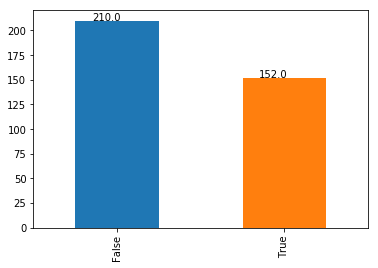

In [19]:
ax = df_filter_2[['claim_id','claim_label']].groupby('claim_id').first().reset_index()['claim_label'].value_counts().plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(int(p.get_height()*1000)/1000), (p.get_x() +0.1, p.get_height() +0.02))

In [21]:
false_claim_ids_2 = df_filter_2[df_filter_2['claim_label']==False][['claim_id','similarity_score']].groupby('claim_id')\
.mean().reset_index().sort_values(by=['similarity_score'], ascending=False).head(152)['claim_id']
print(len(false_claim_ids_2))
true_claim_ids_2 = df_filter_2[df_filter_2['claim_label']==True][['claim_id','claim_label']].groupby('claim_id')\
.first().reset_index()['claim_id']
print(len(true_claim_ids_2))
claim_ids_2 = pd.DataFrame(pd.concat([false_claim_ids_2,true_claim_ids_2]))
print(len(claim_ids_2))

152
152
304


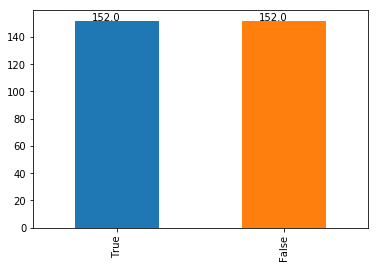

In [22]:
df_filter_3 = pd.merge(df_filter_2,claim_ids_2)
ax = df_filter_3[['claim_id','claim_label']].groupby('claim_id').first().reset_index()['claim_label'].value_counts().plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(int(p.get_height()*1000)/1000), (p.get_x() +0.1, p.get_height() +0.02))

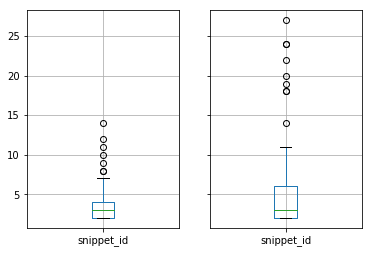

In [23]:
fig, axs = plt.subplots(1,2, sharey = True)
df_filter_3[df_filter_3['claim_label']==True][['claim_id','snippet_id']].groupby('claim_id').count()[['snippet_id']].boxplot(ax=axs[0])
df_filter_3[df_filter_3['claim_label']==False][['claim_id','snippet_id']].groupby('claim_id').count()[['snippet_id']].boxplot(ax=axs[1])

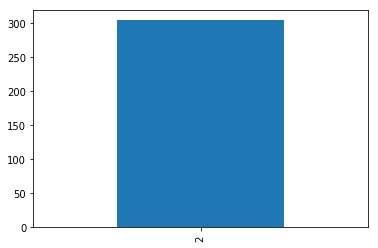

In [33]:
snippet_ids = df_filter_3[['claim_id','snippet_id','similarity_score']]\
.sort_values(by=['claim_id','similarity_score'],ascending=False).groupby('claim_id').head(2).reset_index()[['snippet_id']]


df_filter_4 = pd.merge(df_filter_3, snippet_ids)
df_filter_4[['claim_id','snippet_id']].groupby('claim_id').count()['snippet_id'].value_counts().plot(kind='bar')

/home/ymerej/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/ymerej/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


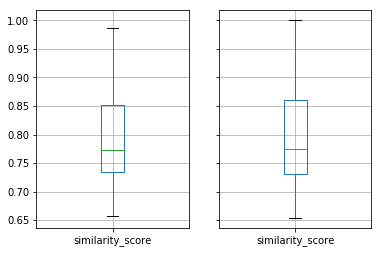

In [34]:
fig, axs = plt.subplots(1,2, sharey = True)
df_filter_4[df_filter['claim_label']==True][['claim_id','similarity_score']].groupby('claim_id').mean()[['similarity_score']].boxplot(ax=axs[0])
df_filter_4[df_filter['claim_label']==False][['claim_id','similarity_score']].groupby('claim_id').mean()[['similarity_score']].boxplot(ax=axs[1])

In [35]:
df_filter_4.to_csv('datasets/08_documents.csv')